# 📊 **Principal Component Analysis (PCA) on Heart Attack Risk Dataset**

---
## 🏆 **Objective**
The goal of this project is to apply **Principal Component Analysis (PCA)** to reduce dimensionality in a **heart attack risk dataset** while retaining key information. PCA helps in **visualizing high-dimensional data** and selecting the most influential features.

---

## 📥 **Step 1: 
Load the Dataset

We begin by **Importing necessary liabraries and then loading the dataset** from the specified path and inspecting its structure.

---

In [186]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [187]:
# Load the dataset
file_path = 'heart_attack_prediction_dataset.csv'  # Update this path to the correct location
df = pd.read_csv(file_path)

## 🛠 **Step 2: Data Preprocessing**

### ✅ **Actions Taken**
- **Dropped unnecessary columns** (`Patient ID`, `Country`, `Continent`, `Hemisphere`)

In [188]:
# Ensure dataset meets record requirement (500+ records)
if df.shape[0] < 500:
    print("Warning: Dataset has fewer than 500 records. Consider using a larger dataset.")

In [189]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=["Patient ID", "Country", "Continent", "Hemisphere"], errors="ignore")
df_cleaned.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,1,0,6,1.514821,160555,21.809144,231,1,5,0


- **Converted categorical variables**:
  - `"Sex"` → `0 (Male)`, `1 (Female)`
  - `"Diet"` → Encoded numerically

In [190]:
# Convert 'Sex' to numeric values (0 = Male, 1 = Female)
df_cleaned["Sex"] = df_cleaned["Sex"].map({"Male": 0, "Female": 1})
df_cleaned.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,0,208,158/88,72,0,0,1,0,0,...,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,0,389,165/93,98,1,1,1,1,1,...,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,1,324,174/99,72,1,0,0,0,0,...,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,0,383,163/100,73,1,1,1,0,1,...,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,0,318,91/88,93,1,1,1,1,0,...,1,0,6,1.514821,160555,21.809144,231,1,5,0


In [191]:
# Encode categorical variable 'Diet' if it exists
if "Diet" in df_cleaned.columns:
    label_encoder = LabelEncoder()
    df_cleaned["Diet"] = label_encoder.fit_transform(df_cleaned["Diet"])

df_cleaned.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,0,208,158/88,72,0,0,1,0,0,...,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,0,389,165/93,98,1,1,1,1,1,...,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,1,324,174/99,72,1,0,0,0,0,...,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,0,383,163/100,73,1,1,1,0,1,...,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,0,318,91/88,93,1,1,1,1,0,...,1,0,6,1.514821,160555,21.809144,231,1,5,0


- **Handled Blood Pressure** by **splitting Systolic & Diastolic values**

In [192]:
# Handle 'Blood Pressure' - Split into Systolic and Diastolic
if "Blood Pressure" in df_cleaned.columns:
    df_cleaned[['Systolic BP', 'Diastolic BP']] = df_cleaned['Blood Pressure'].str.split('/', expand=True).astype(float)
    df_cleaned.drop(columns=['Blood Pressure'], inplace=True)

df_cleaned.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic BP,Diastolic BP
0,67,0,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,158.0,88.0
1,21,0,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,165.0,93.0
2,21,1,324,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,174.0,99.0
3,84,0,383,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,163.0,100.0
4,66,0,318,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,91.0,88.0


- **Checked for missing values** and **imputed if necessary**

In [193]:
# Ensure all values are numeric and drop any non-numeric columns
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

df_cleaned.dropna(inplace=True)
df_cleaned.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic BP,Diastolic BP
0,67,0,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,158.0,88.0
1,21,0,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,165.0,93.0
2,21,1,324,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,174.0,99.0
3,84,0,383,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,163.0,100.0
4,66,0,318,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,91.0,88.0


In [194]:
# Separate features and target variable
target = "Heart Attack Risk"
if target in df_cleaned.columns:
    features = df_cleaned.drop(columns=[target])
else:
    features = df_cleaned.copy()

features.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic BP,Diastolic BP
0,67,0,208,72,0,0,1,0,0,4.168189,...,0,9,6.615001,261404,31.251233,286,0,6,158.0,88.0
1,21,0,389,98,1,1,1,1,1,1.813242,...,0,1,4.963459,285768,27.194973,235,1,7,165.0,93.0
2,21,1,324,72,1,0,0,0,0,2.078353,...,1,9,9.463426,235282,28.176571,587,4,4,174.0,99.0
3,84,0,383,73,1,1,1,0,1,9.828130,...,0,9,7.648981,125640,36.464704,378,3,4,163.0,100.0
4,66,0,318,93,1,1,1,1,0,5.804299,...,0,6,1.514821,160555,21.809144,231,1,5,91.0,88.0


- **Standardized the dataset** using `StandardScaler()`

In [195]:
# Standardize the Features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [196]:
# Convert back to DataFrame for readability
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic BP,Diastolic BP
0,0.625557,-0.658765,-0.641579,-0.147042,-1.369651,-0.986061,0.339157,-1.002857,-1.219867,-1.010838,...,-0.996696,1.234604,0.179251,1.280130,0.373454,-0.588539,-1.528843,-0.514750,0.870044,0.193782
1,-1.539322,-0.658765,1.596895,1.118179,0.730113,1.014136,0.339157,0.997151,0.819762,-1.418027,...,-0.996696,-1.563129,-0.297225,1.582523,-0.268479,-0.816487,-1.090738,-0.011823,1.135714,0.534480
2,-1.539322,1.517992,0.793023,-0.147042,0.730113,-0.986061,-2.948488,-1.002857,-1.219867,-1.372188,...,1.003315,1.234604,1.001031,0.955917,-0.113134,0.756800,0.223577,-1.520604,1.477290,0.943319
3,1.425621,-0.658765,1.522691,-0.098380,0.730113,1.014136,0.339157,-1.002857,0.819762,-0.032188,...,-0.996696,1.234604,0.477557,-0.404902,1.198524,-0.177339,-0.214528,-1.520604,1.059809,1.011458
4,0.578495,-0.658765,0.718820,0.874867,0.730113,1.014136,0.339157,0.997151,-1.219867,-0.727941,...,-0.996696,0.185454,-1.292170,0.028445,-1.120826,-0.834365,-1.090738,-1.017677,-1.672797,0.193782



## 📉 **Apply PCA**

### 🏗 **Process**
- Standardized the dataset to ensure PCA works correctly.

In [197]:
pca = PCA(n_components=len(features.columns))  # Start with max components to analyze variance
principal_components = pca.fit_transform(df_scaled)

- Applied **PCA to all features**.

In [198]:
# Analyze Explained Variance
explained_variance = pca.explained_variance_ratio_.cumsum()

- Determined the **optimal number of components** (90-95% variance retained).

In [199]:
# Find the optimal number of components to retain 90-95% variance
explained_variance_threshold = 0.90  # Set the threshold for explained variance
optimal_components = np.argmax(explained_variance >= explained_variance_threshold) + 1

optimal_components

20

- Transformed the dataset using **Principal Components**.

In [200]:
# Define the imputer
imputer = SimpleImputer(strategy='mean')

# Ensure there are no missing values
df_scaled_imputed = imputer.fit_transform(df_scaled)

# Apply PCA with the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
principal_components_optimal = pca_optimal.fit_transform(df_scaled_imputed)

# Create a DataFrame with the principal components
pca_columns = [f"PC{i}" for i in range(1, optimal_components + 1)]
df_pca = pd.DataFrame(data=principal_components_optimal, columns=pca_columns)

# Display the DataFrame
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,0.896506,-1.240481,-0.052946,-1.293286,-0.398404,1.154179,1.762913,0.722881,-1.643968,-0.026078,-1.589418,-1.158672,0.455802,-0.428269,-0.684811,0.494822,0.318067,-0.314180,0.041150,-0.578032
1,-0.049659,0.538203,-0.173836,-0.953937,-0.360217,-1.928207,1.760522,-0.717507,-0.276194,-0.369943,0.331296,0.603015,-1.348063,1.657397,1.097600,0.576759,-1.548790,2.304353,0.083356,0.346050
2,-3.609223,-0.772427,-0.231797,-2.549720,-0.158618,0.923304,1.319965,-0.337028,0.791267,1.195949,0.550168,-0.079352,0.546574,-0.404368,-0.172559,-1.609042,-0.356085,0.680136,0.584056,-1.312288
3,1.313157,-0.086807,0.169883,-1.414010,1.558320,0.239841,-0.129133,1.306534,0.954476,2.033771,-0.493327,-0.570323,0.164396,0.755250,-1.048295,0.222280,0.024095,1.864101,0.153976,-0.046236
4,0.843187,-0.591796,0.180657,1.594439,-0.628633,-0.556816,0.498715,-1.386368,0.813424,-0.736442,-0.683848,-0.039076,-0.216094,-0.787407,-0.184892,0.139638,-0.904912,2.864412,0.101343,0.086006



## 📊 ** Visualizing PCA Results**

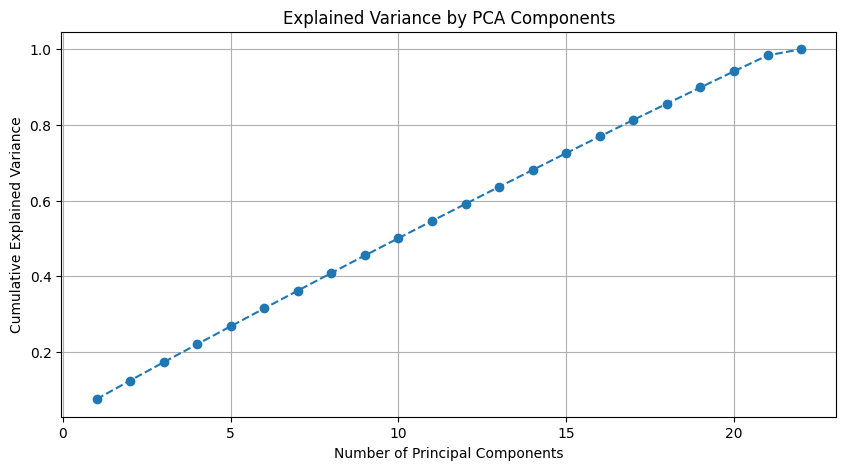

In [208]:
# # Plot explained variance to determine the optimal number of components
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

- **Explained Variance Plot**: Shows how many components are needed for optimal variance retention.

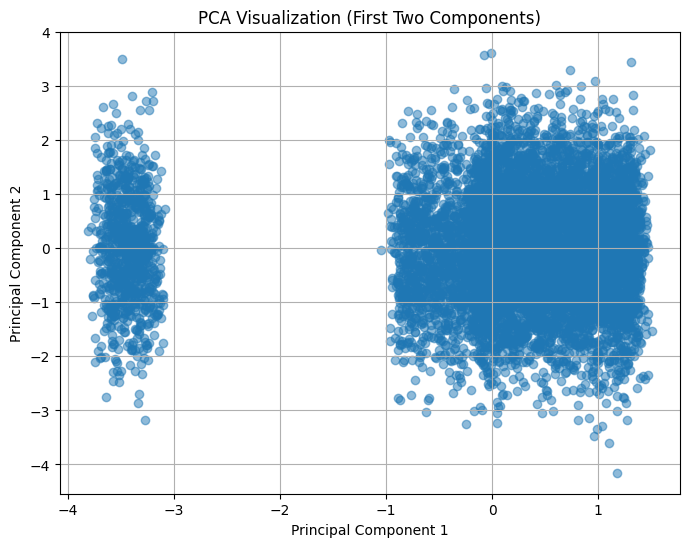

In [204]:
# Scatter plot of first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization (First Two Components)")
plt.grid()
plt.show()

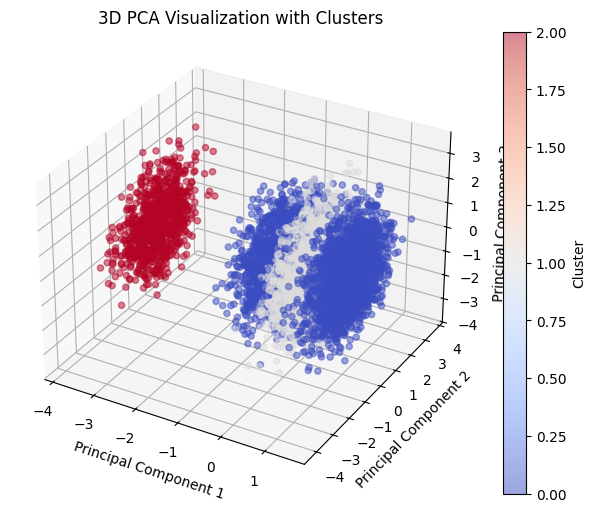

In [212]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca["PC1"], df_pca["PC2"], df_pca["PC3"], c=df_pca["Cluster"], cmap="coolwarm", alpha=0.5)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Visualization with Clusters")
plt.colorbar(scatter, label="Cluster")
plt.show()


In [205]:
# Display final PCA-reduced dataset
print(f"PCA reduced dataset with {optimal_components} components:")
print(df_pca.head())

PCA reduced dataset with 20 components:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.896506 -1.240481 -0.052946 -1.293286 -0.398404  1.154179  1.762913   
1 -0.049659  0.538203 -0.173836 -0.953937 -0.360217 -1.928207  1.760522   
2 -3.609223 -0.772427 -0.231797 -2.549720 -0.158618  0.923304  1.319965   
3  1.313157 -0.086807  0.169883 -1.414010  1.558320  0.239841 -0.129133   
4  0.843187 -0.591796  0.180657  1.594439 -0.628633 -0.556816  0.498715   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.722881 -1.643968 -0.026078 -1.589418 -1.158672  0.455802 -0.428269   
1 -0.717507 -0.276194 -0.369943  0.331296  0.603015 -1.348063  1.657397   
2 -0.337028  0.791267  1.195949  0.550168 -0.079352  0.546574 -0.404368   
3  1.306534  0.954476  2.033771 -0.493327 -0.570323  0.164396  0.755250   
4 -1.386368  0.813424 -0.736442 -0.683848 -0.039076 -0.216094 -0.787407   

       PC15      PC16      PC17      PC18      PC19      P

In [207]:
variance_retained = sum(pca_optimal.explained_variance_ratio_)
print(f"Total variance retained: {variance_retained:.4f}")

Total variance retained: 0.9416
